# Lecture 13 (Regression Algorithms) 

# Ordinary Least Squares (OLS) Regression

The **Ordinary Least Squares (OLS)** method forms the foundational model for regression analysis, capturing the linear relationship between a dependent variable and one or more independent variables by minimizing the sum of squared residuals.

Let us begin by formally specifying the problem. Suppose we are given a dataset of $n$ observations, where each observation consists of a vector of $p$ explanatory variables and a response variable. Let $X \in \mathbb{R}^{n \times p}$ denote the **design matrix**, whose $i$-th row $X_{i \cdot}$ corresponds to the covariates of the $i$-th observation, and let $\mathbf{y} \in \mathbb{R}^n$ denote the vector of observed responses.

We assume a **linear model**:

$$
\mathbf{y} = X \boldsymbol{\beta} + \boldsymbol{\varepsilon},
$$

where $\boldsymbol{\beta} \in \mathbb{R}^p$ is the vector of unknown regression coefficients to be estimated, and $\boldsymbol{\varepsilon} \in \mathbb{R}^n$ is a vector of random errors. It is standard to assume that:

1. $\mathbb{E}[\boldsymbol{\varepsilon}] = \mathbf{0}$,
2. $\mathrm{Var}(\boldsymbol{\varepsilon}) = \sigma^2 I_n$,

where $\sigma^2 > 0$ is an unknown variance parameter and $I_n$ is the $n \times n$ identity matrix.  The method of **ordinary least squares** seeks to find an estimator $\hat{\boldsymbol{\beta}}$ which minimizes the **residual sum of squares**:

$$
\text{RSS}(\boldsymbol{\beta}) = \| \mathbf{y} - X\boldsymbol{\beta} \|_2^2 = (\mathbf{y} - X\boldsymbol{\beta})^\top (\mathbf{y} - X\boldsymbol{\beta}).
$$

The minimization problem is thus:

$$
\hat{\boldsymbol{\beta}} = \arg\min_{\boldsymbol{\beta} \in \mathbb{R}^p} \| \mathbf{y} - X\boldsymbol{\beta} \|_2^2.
$$

We now derive the explicit solution to this optimization problem. Expanding the quadratic form:

$$
\| \mathbf{y} - X\boldsymbol{\beta} \|_2^2 = \mathbf{y}^\top \mathbf{y} - 2 \boldsymbol{\beta}^\top X^\top \mathbf{y} + \boldsymbol{\beta}^\top X^\top X \boldsymbol{\beta}.
$$

Differentiating with respect to $\boldsymbol{\beta}$ and setting the gradient to zero yields:

$$
-2X^\top \mathbf{y} + 2X^\top X \boldsymbol{\beta} = 0,
$$
$$
X^\top X \boldsymbol{\beta} = X^\top \mathbf{y}.
$$

Assuming $X^\top X$ is invertible, which requires that $X$ has full column rank (i.e., the columns of $X$ are linearly independent), the unique solution is given by:

$$
\boxed{ \hat{\boldsymbol{\beta}} = (X^\top X)^{-1} X^\top \mathbf{y} }.
$$

This formula is the **normal equation** for the OLS estimator.

---

## Properties of the OLS Estimator

To proceed rigorously, let us verify some critical properties of $\hat{\boldsymbol{\beta}}$. First, observe that $\hat{\boldsymbol{\beta}}$ is **unbiased**:

$$
\mathbb{E}[\hat{\boldsymbol{\beta}}] = \mathbb{E}\left[(X^\top X)^{-1} X^\top \mathbf{y}\right] = (X^\top X)^{-1} X^\top \mathbb{E}[\mathbf{y}] = (X^\top X)^{-1} X^\top (X\boldsymbol{\beta}) = \boldsymbol{\beta}.
$$

Hence, $\hat{\boldsymbol{\beta}}$ correctly estimates $\boldsymbol{\beta}$ on average.  Secondly, the **covariance matrix** of $\hat{\boldsymbol{\beta}}$ is:

$$
\mathrm{Var}(\hat{\boldsymbol{\beta}}) = (X^\top X)^{-1} X^\top \mathrm{Var}(\mathbf{y}) X (X^\top X)^{-1} = \sigma^2 (X^\top X)^{-1}.
$$

This shows that the dispersion of the estimator decreases as the information in $X$ increases. 

---

## Geometric Interpretation

From a geometric perspective, OLS can be understood as **orthogonal projection**. The fitted values $\hat{\mathbf{y}}$ are given by:

$$
\hat{\mathbf{y}} = X \hat{\boldsymbol{\beta}} = X(X^\top X)^{-1}X^\top \mathbf{y} = P_X \mathbf{y},
$$

where $P_X = X(X^\top X)^{-1}X^\top$ is the **projection matrix** onto the column space of $X$.  Thus, $\hat{\mathbf{y}}$ is the orthogonal projection of $\mathbf{y}$ onto $\mathrm{Col}(X)$, and the residual vector $\mathbf{y} - \hat{\mathbf{y}}$ is orthogonal to the space spanned by the regressors:

$$
X^\top (\mathbf{y} - \hat{\mathbf{y}}) = 0.
$$

This orthogonality condition is another way to characterize the OLS solution.

---

## Estimation of the Variance

Since $\sigma^2$ is generally unknown, it is customary to estimate it by the mean squared residual:

$$
\hat{\sigma}^2 = \frac{1}{n - p} \| \mathbf{y} - X\hat{\boldsymbol{\beta}} \|_2^2.
$$

The denominator $n-p$ reflects the degrees of freedom remaining after estimating $p$ parameters.  Under the assumption of normally distributed errors $\boldsymbol{\varepsilon} \sim \mathcal{N}(0, \sigma^2 I_n)$, one can show that:

1. $\hat{\boldsymbol{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^2 (X^\top X)^{-1})$,
2. $\hat{\sigma}^2$ is an unbiased estimator of $\sigma^2$,
3. $\hat{\boldsymbol{\beta}}$ and $\hat{\sigma}^2$ are independent.

These properties form the foundation for constructing confidence intervals and hypothesis tests in linear regression.



## An explicit numerical example

Below, I am going to write a regression model on an artificial dataset in python:

Let us start with the libraries.

In [29]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.datasets import make_regression

from ucimlrepo import fetch_ucirepo 

import matplotlib.pyplot as plt

Next, we generate an artificial dataset with 100 samples on 5 features.

In [2]:
X, y, coef = make_regression(
    n_samples=100,
    n_features=5,
    noise=0.5,
    coef=True
)

Now we fit the OLS regression model, and retrieve fitted coefficients and intercept.

In [3]:
model = LinearRegression()
model.fit(X, y)

estimated_coefficients = model.coef_
intercept = model.intercept_

Let us make the predictions then evaluate MSE and $R^2$.

In [4]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("True coefficients:", coef)
print("Estimated coefficients:", estimated_coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

True coefficients: [23.67965354 21.10694719  4.1168913  60.59256003 36.84847062]
Estimated coefficients: [23.73722181 21.09691215  4.08185092 60.60636752 36.9443032 ]
Intercept: -0.03422546061216192
Mean Squared Error: 0.25125264530789176
R^2 Score: 0.9999609066299741


The problem with scikit-learn`s regression library that it doesn`t give error bounds on model coefficients. You should use [`statsmodels`](https://www.statsmodels.org/stable/index.html) library for regression models.

In [5]:
X_with_intercept = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_intercept).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.809e+05
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          1.70e-205
Time:                        16:45:13   Log-Likelihood:                -72.829
No. Observations:                 100   AIC:                             157.7
Df Residuals:                      94   BIC:                             173.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0342      0.054     -0.636      0.527      -0.141       0.073
x1            23.7372      0.053    443.966      0.000      23.631      23.843
x2            21.0969      0.048    435.145      0.000      21.001      21.193
x3             4.0819      0.050     81.647      0.000       3.983       4.181
x4            60.6064      0.056   1084.203      0.000      60.495      60.717
x5            36.9443      0.050    743.743      0.000      36.846      37.043
==============================================================================
Omnibus:                        2.301   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.139
Skew:                           0.356   Prob(JB):                        0.343
Kurtosis:                       2.922   Cond. No.                         1.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Another Dataset

For the next example, we are going to use [The Air Quality Dataset](https://archive.ics.uci.edu/dataset/360/air+quality) from [UCI`s data repository](https://archive.ics.uci.edu/).

In [24]:
air_quality = fetch_ucirepo(id=360) 
air_X = air_quality.data.features 

air_X

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


The problem with this dataset is the column names. We need to remove all of the special characters.

In [39]:
air_X = air_X.rename(columns=lambda x: x.strip().replace('.', '_').replace('(', '_').replace(')', ''))
air_X

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


We will construct a linear OLS model one variable against all others. We'll use the formula API of the statsmodels OLS.

In [53]:
formula = 'AH ~ ' + ' + '.join(air_X.columns[2:14])
formula

'AH ~ CO_GT + PT08_S1_CO + NMHC_GT + C6H6_GT + PT08_S2_NMHC + NOx_GT + PT08_S3_NOx + NO2_GT + PT08_S4_NO2 + PT08_S5_O3 + T + RH'

In [54]:
model = smf.ols(formula=formula, data=air_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AH   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.161e+06
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:51:28   Log-Likelihood:                -13361.
No. Observations:                9357   AIC:                         2.675e+04
Df Residuals:                    9344   BIC:                         2.684e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.4521      0.257     40.642      0.000       9.948      10.956
CO_GT        -6.293e-05      0.000     -0.340      0.734      -0.000       0.000
PT08_S1_CO      -0.0006      0.000     -4.163      0.000      -0.001      -0.000
NMHC_GT          0.0017    9.2e-05     18.960      0.000       0.002       0.002
C6H6_GT          0.7720      0.005    171.396      0.000       0.763       0.781
PT08_S2_NMHC    -0.0176      0.000    -70.205      0.000      -0.018      -0.017
NOx_GT          -0.0034      0.000    -32.735      0.000      -0.004      -0.003
PT08_S3_NOx     -0.0010   9.25e-05    -10.714      0.000      -0.001      -0.001
NO2_GT           0.0054      0.000     29.709      0.000       0.005       0.006
PT08_S4_NO2     -0.0049   9.07e-05    -54.575      0.000      -0.005      -0.005
PT08_S5_O3       0.0008   7.73e-05      9.708      0.000       0.001       0.001
T                0.2246      0.002     91.692      0.000       0.220       0.229
RH               0.0745      0.001     68.460      0.000       0.072       0.077
==============================================================================
Omnibus:                     3701.086   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51943.468
Skew:                          -1.508   Prob(JB):                         0.00
Kurtosis:                      14.141   Cond. No.                     6.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, observe that the coefficient of `CO_GT` is not significant. Let us remove it and reconstruct the model.

In [61]:
formula = 'AH ~ ' + ' + '.join(air_X.columns[3:14])
model = smf.ols(formula=formula, data=air_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AH   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.267e+06
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:55:33   Log-Likelihood:                -13361.
No. Observations:                9357   AIC:                         2.675e+04
Df Residuals:                    9345   BIC:                         2.683e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.4552      0.257     40.683      0.000       9.951      10.959
PT08_S1_CO      -0.0006      0.000     -4.161      0.000      -0.001      -0.000
NMHC_GT          0.0017   9.16e-05     19.021      0.000       0.002       0.002
C6H6_GT          0.7721      0.005    171.465      0.000       0.763       0.781
PT08_S2_NMHC    -0.0176      0.000    -70.208      0.000      -0.018      -0.017
NOx_GT          -0.0034      0.000    -32.831      0.000      -0.004      -0.003
PT08_S3_NOx     -0.0010   9.25e-05    -10.726      0.000      -0.001      -0.001
NO2_GT           0.0054      0.000     32.112      0.000       0.005       0.006
PT08_S4_NO2     -0.0049   9.07e-05    -54.577      0.000      -0.005      -0.005
PT08_S5_O3       0.0008   7.72e-05      9.720      0.000       0.001       0.001
T                0.2246      0.002     91.732      0.000       0.220       0.229
RH               0.0745      0.001     68.500      0.000       0.072       0.077
==============================================================================
Omnibus:                     3701.246   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51996.807
Skew:                          -1.508   Prob(JB):                         0.00
Kurtosis:                      14.148   Cond. No.                     6.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
PT08_S1_CO,1.0,8.315959e+06,8.315959e+06,8.157047e+06,0.000000e+00
NMHC_GT,1.0,2.022090e+05,2.022090e+05,1.983449e+05,0.000000e+00
C6H6_GT,1.0,5.552369e+06,5.552369e+06,5.446268e+06,0.000000e+00
PT08_S2_NMHC,1.0,1.182881e+05,1.182881e+05,1.160277e+05,0.000000e+00
NOx_GT,1.0,8.611198e+02,8.611198e+02,8.446645e+02,7.271257e-178
PT08_S3_NOx,1.0,3.620287e+03,3.620287e+03,3.551106e+03,0.000000e+00
NO2_GT,1.0,1.423615e+03,1.423615e+03,1.396410e+03,5.717352e-285
PT08_S4_NO2,1.0,5.437034e+02,5.437034e+02,5.333136e+02,8.434353e-115
PT08_S5_O3,1.0,5.458312e+00,5.458312e+00,5.354007e+00,2.069628e-02
T,1.0,3.866154e+03,3.866154e+03,3.792275e+03,0.000000e+00


In [69]:
model = smf.ols(formula='AH ~ C6H6_GT + PT08_S2_NMHC', data=air_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AH   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.679e+06
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:58:05   Log-Likelihood:                -17832.
No. Observations:                9357   AIC:                         3.567e+04
Df Residuals:                    9354   BIC:                         3.569e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.0860      0.070    259.356      0.000      17.949      18.223
C6H6_GT          1.1191      0.001   1764.573      0.000       1.118       1.120
PT08_S2_NMHC    -0.0302   7.67e-05   -393.878      0.000      -0.030      -0.030
==============================================================================
Omnibus:                     5283.330   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68052.498
Skew:                          -2.456   Prob(JB):                         0.00
Kurtosis:                      15.264   Cond. No.                     3.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,1.781525e+05,1.0,6.726561e+04,0.0
C6H6_GT,8.246662e+06,1.0,3.113718e+06,0.0
PT08_S2_NMHC,4.108871e+05,1.0,1.551400e+05,0.0
Residual,2.477400e+04,9354.0,NaN,NaN


## Another Example



In [79]:
liver_disorders = fetch_ucirepo(id=60) 

liver_df = pd.concat([liver_disorders.data.features, liver_disorders.data.targets], axis=1)
liver_df

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


In [97]:
liver_df.corr()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224
drinks,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000


In [94]:
model = smf.ols(formula='drinks ~ ( mcv + gammagt + sgot + sgpt + alkphos )**4', data=liver_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 drinks   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.453
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.13e-15
Time:                        21:19:16   Log-Likelihood:                -832.53
No. Observations:                 345   AIC:                             1727.
Df Residuals:                     314   BIC:                             1846.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    86.7495    133.176      0.651      0.515    -175.282     348.781
mcv                          -0.8516      1.481     -0.575      0.566      -3.765       2.062
gammagt                       2.6609      2.398      1.110      0.268      -2.057       7.379
sgot                         -7.0780      6.081     -1.164      0.245     -19.043       4.887
sgpt                         -5.2908      4.015     -1.318      0.189     -13.191       2.610
alkphos                      -0.4037      2.100     -0.192      0.848      -4.536       3.729
mcv:gammagt                  -0.0291      0.026     -1.118      0.264      -0.080       0.022
mcv:sgot                      0.0748      0.067      1.112      0.267      -0.057       0.207
mcv:sgpt                      0.0554      0.044      1.254      0.211      -0.032       0.142
mcv:alkphos                   0.0033      0.023      0.140      0.889      -0.043       0.049
gammagt:sgot                 -0.0035      0.087     -0.040      0.968      -0.175       0.168
gammagt:sgpt                 -0.0417      0.037     -1.114      0.266      -0.115       0.032
gammagt:alkphos              -0.0546      0.032     -1.694      0.091      -0.118       0.009
sgot:sgpt                     0.2708      0.133      2.041      0.042       0.010       0.532
sgot:alkphos                  0.0822      0.088      0.930      0.353      -0.092       0.256
sgpt:alkphos                  0.0528      0.061      0.864      0.389      -0.067       0.173
mcv:gammagt:sgot            6.66e-05      0.001      0.070      0.944      -0.002       0.002
mcv:gammagt:sgpt              0.0004      0.000      1.103      0.271      -0.000       0.001
mcv:gammagt:alkphos           0.0006      0.000      1.692      0.092   -9.67e-05       0.001
mcv:sgot:sgpt                -0.0029      0.001     -1.969      0.050      -0.006   -1.45e-06
mcv:sgot:alkphos             -0.0008      0.001     -0.871      0.384      -0.003       0.001
mcv:sgpt:alkphos             -0.0005      0.001     -0.815      0.415      -0.002       0.001
gammagt:sgot:sgpt            -0.0003      0.000     -0.739      0.460      -0.001       0.000
gammagt:sgot:alkphos          0.0004      0.001      0.327      0.744      -0.002       0.002
gammagt:sgpt:alkphos          0.0009      0.000      1.920      0.056   -2.28e-05       0.002
sgot:sgpt:alkphos            -0.0037      0.002     -1.821      0.070      -0.008       0.000
mcv:gammagt:sgot:sgpt      3.011e-06   4.19e-06      0.718      0.473   -5.24e-06    1.13e-05
mcv:gammagt:sgot:alkphos  -4.085e-06   1.18e-05     -0.348      0.728   -2.72e-05     1.9e-05
mcv:gammagt:sgpt:alkphos  -9.431e-06   5.01e-06     -1.881      0.061   -1.93e-05    4.36e-07
mcv:sgot:sgpt:alkphos      3.886e-05    2.2e-05      1.765      0.079   -4.

In [95]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
mcv,1.0,374.703135,374.703135,46.694147,4.319032e-11
gammagt,1.0,297.656194,297.656194,37.092836,3.288174e-09
sgot,1.0,35.966719,35.966719,4.482042,3.503882e-02
sgpt,1.0,6.809918,6.809918,0.848627,3.576482e-01
alkphos,1.0,6.511969,6.511969,0.811498,3.683681e-01
mcv:gammagt,1.0,4.941646,4.941646,0.615810,4.332002e-01
mcv:sgot,1.0,17.020225,17.020225,2.120999,1.462909e-01
mcv:sgpt,1.0,9.831884,9.831884,1.225214,2.691871e-01
mcv:alkphos,1.0,45.211927,45.211927,5.634147,1.821529e-02
gammagt:sgot,1.0,70.859554,70.859554,8.830261,3.191620e-03


# Regularization 

In statistical learning and machine learning, **regularization** refers to the principle of augmenting the objective function of an estimation problem with an additional penalty term that discourages complex or "overfitted" solutions. To place this idea formally: suppose that we have a model $f_{\mathbf \beta}(x)$ and the primary objective is to minimize a loss function $L(\boldsymbol{\beta})$, typically representing empirical risk, for instance, the residual sum of squares:

$$
L(\boldsymbol{\beta}) = \mathbb{E}(\|\mathbf{y} - f_\beta(x)\|_2^2)
$$

Regularization modifies the problem by introducing a **penalty functional** $\Omega(\boldsymbol{\beta})$ and a **regularization parameter** $\lambda \geq 0$ controlling the strength of the penalty. The **regularized optimization problem** becomes:

$$
\hat{\boldsymbol{\beta}} = \arg\min_{\boldsymbol{\beta} \in \mathbb{R}^p} \left( \|\mathbf{y} - f_\boldsymbol{\beta}(x)\|_2^2 + \lambda \Omega(\boldsymbol{\beta}) \right).
$$

The choice of $\Omega$ critically affects the nature of the solution. 

It is crucial to recognize that regularization serves a profound structural role in machine learning and statistical modeling:

- **Bias-Variance Tradeoff**: Regularization increases bias (by shrinking or thresholding coefficients) but decreases variance (by stabilizing the estimation procedure).
- **Model Complexity Control**: Penalty terms effectively control the complexity of the model class, mitigating the risk of overfitting.
- **Generalization Error Minimization**: Regularized models often generalize better to unseen data, compared to unregularized models, especially when data are noisy or high-dimensional.
- **Implicit Prior Knowledge**: From a Bayesian perspective, regularization corresponds to placing a prior distribution on $\boldsymbol{\beta}$. Ridge regression corresponds to a Gaussian prior; lasso corresponds to a Laplace (double exponential) prior.

Thus, regularization is not merely a technical modification but reflects deep epistemological and statistical principles governing learning from data.

# Regularized Regression Algorithms

In the context of regression, regularization typically means discouraging excessively large regression coefficients, thus favoring models that are simpler, more stable, and better at generalizing to unseen data. In the following, we analyze three major choices: **ridge regression** (also called Tikhonov regularization), **lasso regression**, and the **elastic net**.

## Ridge Regression

**Ridge regression** uses an $\ell_2$-norm penalty:

$$
\Omega(\boldsymbol{\beta}) = \|\boldsymbol{\beta}\|_2^2 = \sum_{j=1}^p \beta_j^2.
$$

Thus, the ridge estimator solves:

$$
\hat{\boldsymbol{\beta}}^{\text{ridge}} = \arg\min_{\boldsymbol{\beta} \in \mathbb{R}^p} \left( \|\mathbf{y} - X\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2 \right).
$$

Let us derive its explicit solution. The objective is a strictly convex quadratic function, thus possessing a unique minimizer. Differentiating the objective with respect to $\boldsymbol{\beta}$ and setting the gradient to zero yields:

$$
-2X^\top (\mathbf{y} - X\boldsymbol{\beta}) + 2\lambda \boldsymbol{\beta} = 0,
$$
$$
(X^\top X + \lambda I_p)\boldsymbol{\beta} = X^\top \mathbf{y}.
$$

Thus, assuming $\lambda > 0$ and hence $X^\top X + \lambda I_p$ invertible, the ridge estimator is:

$$
\boxed{ \hat{\boldsymbol{\beta}}^{\text{ridge}} = (X^\top X + \lambda I_p)^{-1} X^\top \mathbf{y} }.
$$

Observe the formal similarity to the OLS solution. The penalty term $\lambda I_p$ ensures invertibility even if $X^\top X$ is singular (which can happen if $p > n$ or if there are multicollinearities among the predictors).

**Interpretation:** Ridge regression shrinks the coefficients towards zero, but never exactly to zero. It stabilizes the solution especially in ill-posed or high-dimensional settings, but it does **not** produce sparse solutions (i.e., it does not perform variable selection).

---

## Lasso Regression

**Lasso regression** (**Least Absolute Shrinkage and Selection Operator**) uses an $\ell_1$-norm penalty:

$$
\Omega(\boldsymbol{\beta}) = \|\boldsymbol{\beta}\|_1 = \sum_{j=1}^p |\beta_j|.
$$

The optimization problem is:

$$
\hat{\boldsymbol{\beta}}^{\text{lasso}} = \arg\min_{\boldsymbol{\beta} \in \mathbb{R}^p} \left( \|\mathbf{y} - X\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_1 \right).
$$

Unlike ridge regression, the $\ell_1$-penalty introduces **nonsmoothness** into the optimization problem at points where $\beta_j = 0$. As a consequence, lasso can drive some coefficients exactly to zero, thus achieving **sparsity**: selecting a subset of relevant features.  There is no closed-form solution for the lasso in general. However, specialized algorithms such as **coordinate descent** and **least angle regression (LARS)** are able to compute solutions efficiently.

**Key properties of lasso** include:

- Sparse solutions: lasso performs variable selection automatically.
- Nonlinearity: the mapping from $\mathbf{y}$ to $\hat{\boldsymbol{\beta}}^{\text{lasso}}$ is no longer linear (in contrast with OLS and ridge).
- Bias: lasso introduces more bias than ridge regression because of the nonsmooth penalty.

One can understand this difference geometrically. The constraint region defined by $\|\boldsymbol{\beta}\|_2^2 \leq c$ (ridge) is a ball, whereas $\|\boldsymbol{\beta}\|_1 \leq c$ (lasso) defines a diamond-like polytope. The vertices of the polytope align with coordinate axes, promoting sparsity.

---

## Elastic Net Regression

The **elastic net** regularization interpolates between ridge and lasso by combining $\ell_1$- and $\ell_2$-norm penalties:

$$
\Omega(\boldsymbol{\beta}) = \alpha \|\boldsymbol{\beta}\|_1 + (1-\alpha) \|\boldsymbol{\beta}\|_2^2,
$$

where $\alpha \in [0,1]$ is a hyperparameter controlling the tradeoff between the two penalties.

The elastic net estimator thus solves:

$$
\hat{\boldsymbol{\beta}}^{\text{EN}} = \arg\min_{\boldsymbol{\beta} \in \mathbb{R}^p} \left( \|\mathbf{y} - X\boldsymbol{\beta}\|_2^2 + \lambda \left( \alpha \|\boldsymbol{\beta}\|_1 + (1-\alpha) \|\boldsymbol{\beta}\|_2^2 \right) \right).
$$

When $\alpha = 1$, we recover lasso; when $\alpha = 0$, we recover ridge regression.  Elastic net is particularly useful when:

- There are groups of correlated predictors. Lasso tends to select one predictor from a group and ignore the others, while elastic net encourages grouped selection.
- $p \gg n$. Elastic net can select more variables than observations, whereas lasso can select at most $n$ variables.

The estimation of elastic net solutions typically employs coordinate descent methods, similar to lasso, but adapted to the mixed penalty.

# Bias-Variance Decomposition for Regularized Regression

Consider again the standard linear regression setting where

$$
\mathbf{y} = X \boldsymbol{\beta} + \boldsymbol{\varepsilon},
$$

with $\boldsymbol{\varepsilon} \sim \mathcal{N}(0, \sigma^2 I_n)$.  
Let $\hat{\boldsymbol{\beta}} = \hat{\boldsymbol{\beta}}(\mathbf{y})$ denote a generic estimator of $\boldsymbol{\beta}$, potentially regularized (such as ridge, lasso, or elastic net).

We are interested in analyzing the **expected prediction error** at a new covariate vector $x_0 \in \mathbb{R}^p$, defined as:

$$
\mathbb{E} \left[ (x_0^\top \hat{\boldsymbol{\beta}} - x_0^\top \boldsymbol{\beta})^2 \right],
$$

where the expectation is over the randomness in $\mathbf{y}$ through $\boldsymbol{\varepsilon}$.

---

## Derivation

Let us expand the quantity inside the expectation:

$$
(x_0^\top \hat{\boldsymbol{\beta}} - x_0^\top \boldsymbol{\beta})^2 = \left( x_0^\top (\hat{\boldsymbol{\beta}} - \boldsymbol{\beta}) \right)^2.
$$

Define:

$$
\eta := x_0^\top \hat{\boldsymbol{\beta}}.
$$
$$
\theta := x_0^\top \boldsymbol{\beta}.
$$

Thus, the quantity of interest is:

$$
\mathbb{E}[(\eta - \theta)^2] = \mathrm{Var}(\eta) + \left( \mathbb{E}[\eta] - \theta \right)^2.
$$

This is the **bias-variance decomposition** at the point $x_0$.

Explicitly:

- $\mathrm{Var}(\eta)$ measures the variability of the prediction due to randomness in the data;
- $\left( \mathbb{E}[\eta] - \theta \right)^2$ measures the **squared bias** — the error due to systematic deviation of the expected prediction from the true value.

Thus:

$$
\boxed{ \mathbb{E} \left[ (x_0^\top \hat{\boldsymbol{\beta}} - x_0^\top \boldsymbol{\beta})^2 \right] = \underbrace{ \mathrm{Var}(x_0^\top \hat{\boldsymbol{\beta}}) }_{\text{Variance}} + \underbrace{ (x_0^\top \mathbb{E}[\hat{\boldsymbol{\beta}}] - x_0^\top \boldsymbol{\beta})^2 }_{\text{Bias}^2} }.
$$

---

## Computation for Ridge Regression

Let us specialize now to **ridge regression**, where:

$$
\hat{\boldsymbol{\beta}}^{\text{ridge}} = (X^\top X + \lambda I_p)^{-1} X^\top \mathbf{y}.
$$

We have:

$$
\hat{\boldsymbol{\beta}}^{\text{ridge}} = (X^\top X + \lambda I_p)^{-1} X^\top (X\boldsymbol{\beta} + \boldsymbol{\varepsilon}) = (X^\top X + \lambda I_p)^{-1} X^\top X \boldsymbol{\beta} + (X^\top X + \lambda I_p)^{-1} X^\top \boldsymbol{\varepsilon}.
$$

Thus, taking expectation:

$$
\mathbb{E}[\hat{\boldsymbol{\beta}}^{\text{ridge}}] = (X^\top X + \lambda I_p)^{-1} X^\top X \boldsymbol{\beta}.
$$

Therefore, ridge regression is **biased** unless $\lambda = 0$.

The **bias** at point $x_0$ is:

$$
\text{Bias}(x_0) = x_0^\top \left( (X^\top X + \lambda I_p)^{-1} X^\top X - I_p \right) \boldsymbol{\beta}.
$$

And the squared bias is:

$$
\text{Bias}^2(x_0) = \left( x_0^\top \left( (X^\top X + \lambda I_p)^{-1} X^\top X - I_p \right) \boldsymbol{\beta} \right)^2.
$$

The **variance** term is:

Since $\boldsymbol{\varepsilon} \sim \mathcal{N}(0, \sigma^2 I_n)$, we have:

$$
\mathrm{Var}(\hat{\boldsymbol{\beta}}^{\text{ridge}}) = (X^\top X + \lambda I_p)^{-1} X^\top \mathrm{Var}(\mathbf{y}) X (X^\top X + \lambda I_p)^{-1} = \sigma^2 (X^\top X + \lambda I_p)^{-1} X^\top X (X^\top X + \lambda I_p)^{-1}.
$$

Thus:

$$
\mathrm{Var}(x_0^\top \hat{\boldsymbol{\beta}}^{\text{ridge}}) = \sigma^2 x_0^\top (X^\top X + \lambda I_p)^{-1} X^\top X (X^\top X + \lambda I_p)^{-1} x_0.
$$

Hence, the total expected prediction error is:

$$
\boxed{ \mathbb{E} \left[ (x_0^\top \hat{\boldsymbol{\beta}}^{\text{ridge}} - x_0^\top \boldsymbol{\beta})^2 \right] = \sigma^2 x_0^\top (X^\top X + \lambda I_p)^{-1} X^\top X (X^\top X + \lambda I_p)^{-1} x_0 + \left( x_0^\top \left( (X^\top X + \lambda I_p)^{-1} X^\top X - I_p \right) \boldsymbol{\beta} \right)^2 }.
$$

---

## Interpretation

- As $\lambda \to 0$, ridge regression approaches OLS, and bias disappears, but variance may increase dramatically if $X^\top X$ is ill-conditioned or nearly singular.
- As $\lambda \to \infty$, ridge regression shrinks coefficients heavily towards zero, bias grows large, but variance diminishes toward zero.
- Thus, **regularization trades variance for bias**: it sacrifices perfect fitting of the training data (thus introducing bias) in exchange for reduced variance and better generalization to new data.

This is the **bias-variance tradeoff** in its rigorous quantitative form.

---

## Generalization to Other Regularized Estimators

While we have computed the bias-variance decomposition explicitly for ridge regression, similar principles apply to other regularized estimators:

- **Lasso regression** similarly introduces bias by shrinking coefficients, although the analysis is complicated by the nonsmooth $\ell_1$-penalty (lasso bias-variance decomposition is more intricate and typically involves subdifferential calculus).
- **Elastic net regression** combines the behaviors of ridge and lasso, interpolating between their bias and variance characteristics depending on the mixture parameter $\alpha$.

Nevertheless, the qualitative conclusion remains: regularization controls variance at the cost of introducing bias, and optimal predictive performance arises by balancing these two competing forces.


# Numerical Example: Ridge Regression vs Ordinary Least Squares

## Python Code

I am going to do a sythetic example to compare ordinary OLS regression with other regularized regressions. But first we need a sythetic dataset of a reasonable size:

In [6]:
n_samples = 100  # number of data points
n_features = 5   # number of features

cov = np.array([
    [1.0, 0.9, 0.8, 0.9, 0.85],
    [0.9, 1.0, 0.88, 0.9, 0.87],
    [0.8, 0.88, 1.0, 0.85, 0.9],
    [0.9, 0.9, 0.85, 1.0, 0.88],
    [0.85, 0.87, 0.9, 0.88, 1.0]
])

true_beta = np.array([2.5, -1.7, 0.0, 3.2, -2.0])

# Generate features X ~ N(0, cov)
X = np.random.multivariate_normal(mean=np.zeros(n_features), cov=cov, size=n_samples)

# Generate response variable with noise
noise = np.random.normal(0, 0.5, size=n_samples)
y = X @ true_beta + noise

np.linalg.det(np.matmul(X.T,X))

np.float64(4213821.018624786)

Note that the determinant of the matrix $X^T\cdot X$ is very large which will cause numerical stability issues in regression coefficents. Now, let us fit the OLS model and look at the coefficients:


In [7]:
# Fit OLS (ordinary least squares) regression
ols_model = LinearRegression(fit_intercept=False)  # No intercept, since we generated without one
ols_model.fit(X, y)

LinearRegression(fit_intercept=False)

Now, let us repeat the model fitting with the ridge regression:

In [8]:
# Regularization parameter (lambda)
alpha = 1.0

# Fit Ridge regression
ridge_model = Ridge(alpha=alpha, fit_intercept=False)
ridge_model.fit(X, y)

Ridge(fit_intercept=False)

Next, Lasso regression:

In [9]:
lasso_alpha = 1.0  # Regularization strength for Lasso
lasso_model = Lasso(alpha=lasso_alpha, fit_intercept=False, max_iter=10000)
lasso_model.fit(X, y)

Lasso(fit_intercept=False, max_iter=10000)

And, finally the elastic net:

In [10]:
en_alpha = 1.0    # Regularization strength
en_l1_ratio = 0.5  # 0.5 means equal mix of l1 and l2 penalties
elastic_net_model = ElasticNet(alpha=en_alpha, l1_ratio=en_l1_ratio, fit_intercept=False, max_iter=10000)
elastic_net_model.fit(X, y)

ElasticNet(fit_intercept=False, max_iter=10000)

In [11]:
# Display estimated coefficients
result = pd.DataFrame({
    'Feature': [f"β_{idx+1}" for idx in range(n_features)],
    'True Coefficients' : true_beta,
    'OLS Model Coeff.' : np.round(ols_model.coef_,1),
    'Ridge Regression Coeff.': np.round(ridge_model.coef_,1),
    'Lasso Regression Coeff.': np.round(lasso_model.coef_,1),
    'Elastic Net Reg. Coeff.': np.round(elastic_net_model.coef_,1)
})

result

,Feature,True Coefficients,OLS Model Coeff.,Ridge Regression Coeff.,Lasso Regression Coeff.,Elastic Net Reg. Coeff.
0,β_1,2.5,2.4,2.2,0.3,0.7
1,β_2,-1.7,-1.3,-1.1,0.0,0.0
2,β_3,0.0,-0.3,-0.5,0.0,0.0
3,β_4,3.2,3.4,3.2,1.0,0.8
4,β_5,-2.0,-2.0,-1.7,0.0,0.0


## Model Fit

The **standard coefficient of determination** $R^2$ is:

$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}},
$$

where:

- $\text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$ is the residual sum of squares,
- $\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ is the total sum of squares.

However, $R^2$ tends to **inflate** as the number of parameters grows.  
Thus, the **adjusted $R^2$** corrects for model complexity:

$$
\text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \frac{n - 1}{n - p},
$$

where:

- $n$ is the number of observations,
- $p$ is the number of predictors (features) used in the model (not necessarily the total number of features if some coefficients are exactly zero, e.g., lasso).

**Important:**  

For lasso and elastic net, one may use **the number of nonzero coefficients** as $p$, since coefficients that are exactly zero are effectively excluded from the model.

### Notes

- The function `adjusted_r2` computes $R^2$ and then adjusts it based on effective number of predictors $p$.
- For **lasso** and **elastic net**, $p$ is the number of nonzero coefficients.
- For **OLS** and **ridge**, all predictors are effectively included, so $p = \dim(X)[1]$.
- If $p=0$ (e.g., a degenerate lasso that zeroes out everything), the function returns `np.nan` to indicate an undefined adjusted $R^2$.

### Expected Observations

- **OLS** will usually have the highest unadjusted $R^2$ but might not have the best adjusted $R^2$ if it overfits due to multicollinearity.
- **Ridge** may have slightly lower $R^2$ but better generalization and a competitive adjusted $R^2$.
- **Lasso** could improve adjusted $R^2$ if it sparsifies unnecessary variables.
- **Elastic Net** balances sparsity and shrinkage, so depending on data, its adjusted $R^2$ could be competitive.


In [12]:
def adjusted_r2(model, X, y):
    n = X.shape[0]
    y_pred = model.predict(X)
    rss = np.sum((y - y_pred) ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - rss / tss
    # For lasso and elastic net, p = number of nonzero coefficients
    if isinstance(model, (Lasso, ElasticNet)):
        p = np.sum(model.coef_ != 0)
    else:
        p = X.shape[1]  # use all features for OLS and Ridge 
    if p == 0:  # to prevent division by zero
        return np.nan
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p)
    return adj_r2

# Compute adjusted R^2 for each model
adj_r2_ols = adjusted_r2(ols_model, X, y)
adj_r2_ridge = adjusted_r2(ridge_model, X, y)
adj_r2_lasso = adjusted_r2(lasso_model, X, y)
adj_r2_elastic = adjusted_r2(elastic_net_model, X, y)

# Display results
print("\nAdjusted R^2 Scores:")
print(f"  OLS         : {adj_r2_ols:.4f}")
print(f"  Ridge       : {adj_r2_ridge:.4f}")
print(f"  Lasso       : {adj_r2_lasso:.4f}")
print(f"  Elastic Net : {adj_r2_elastic:.4f}")



Adjusted R^2 Scores:
  OLS         : 0.9644
  Ridge       : 0.9620
  Lasso       : 0.5327
  Elastic Net : 0.5719


# Logistic and Probit Regression: Introduction to Binary Response Models

Suppose again we have a dataset:

- $X \in \mathbb{R}^{n \times p}$ : the matrix of covariates (features),
- $y \in \{0,1\}^n$ : binary response variable.

We wish to model the **conditional probability**:

$$
\mathbb{P}(y_i = 1 \mid x_i),
$$

where $x_i$ is the $i$-th row of $X$.  In li|near regression, one might naively consider modeling $y_i$ as $x_i^\top \boldsymbol{\beta}$, but this approach is deeply flawed because:

- $x_i^\top \boldsymbol{\beta} \in \mathbb{R}$, while $\mathbb{P}(y_i=1 \mid x_i) \in [0,1]$.
- Thus, linear models can yield meaningless predictions outside \([0,1]\).

**Solution:** Instead of modeling the conditional probability directly, we model a **transformation** of it, ensuring that the final prediction remains within $(0,1)$. This is the role of the **link function** in generalized linear models.

---

## Logistic Regression

In **logistic regression**, we model the **log-odds** (also called the **logit**) of the probability as a linear function of the predictors:

$$
\log\left( \frac{\mathbb{P}(y_i = 1 \mid x_i)}{1 - \mathbb{P}(y_i = 1 \mid x_i)} \right) = x_i^\top \boldsymbol{\beta}.
$$

Thus, rearranging:

$$
\mathbb{P}(y_i = 1 \mid x_i) = \frac{1}{1 + \exp(-x_i^\top \boldsymbol{\beta})}.
$$

This is the **logistic function** or **sigmoid function**:

$$
\sigma(z) = \frac{1}{1+\exp(-z)}.
$$

Hence, logistic regression postulates:

$$
\boxed{ \mathbb{P}(y_i = 1 \mid x_i) = \sigma(x_i^\top \boldsymbol{\beta}) }.
$$

---

### Estimation: Maximum Likelihood

Assuming independence across observations, the **likelihood function** is:

$$
L(\boldsymbol{\beta}) = \prod_{i=1}^n \left( \sigma(x_i^\top \boldsymbol{\beta}) \right)^{y_i} \left(1 - \sigma(x_i^\top \boldsymbol{\beta})\right)^{1 - y_i}.
$$

The **log-likelihood** is:

$$
\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log \sigma(x_i^\top \boldsymbol{\beta}) + (1 - y_i) \log(1 - \sigma(x_i^\top \boldsymbol{\beta})) \right].
$$

Since the logistic function is smooth and strictly increasing, \(\ell(\boldsymbol{\beta})\) is a concave function of $\boldsymbol{\beta}$.  
Thus, the maximum likelihood estimator $\hat{\boldsymbol{\beta}}$ can be obtained by solving:

$$
\hat{\boldsymbol{\beta}} = \arg\max_{\boldsymbol{\beta} \in \mathbb{R}^p} \ell(\boldsymbol{\beta}).
$$

The score equations (first-order conditions) are:

$$
\frac{\partial \ell}{\partial \boldsymbol{\beta}} = \sum_{i=1}^n (y_i - \sigma(x_i^\top \boldsymbol{\beta})) x_i = 0.
$$

**Note:** These equations are **nonlinear** in $\boldsymbol{\beta}$, and no closed-form solution exists in general.  
We solve for $\hat{\boldsymbol{\beta}}$ using iterative optimization methods such as **Newton-Raphson**, **iteratively reweighted least squares (IRLS)**, or modern variants (e.g., BFGS).

---

## Probit Regression

In **probit regression**, rather than modeling the log-odds, we model the probability using the **standard normal cumulative distribution function**:

$$
\boxed{ \mathbb{P}(y_i = 1 \mid x_i) = \Phi(x_i^\top \boldsymbol{\beta}) },
$$

where $\Phi(z)$ is the standard normal CDF:

$$
\Phi(z) = \int_{-\infty}^z \frac{1}{\sqrt{2\pi}} e^{-u^2/2} \, du.
$$

Thus, the probit model assumes that the **latent propensity** $x_i^\top \boldsymbol{\beta}$ is perturbed by normal noise and observed through a threshold mechanism. Logistic and probit regression models are **qualitatively similar**. The main difference lies in the choice of link function: logit vs. normal CDF.

---

### Estimation: Maximum Likelihood

Similarly, the **log-likelihood** under probit regression is:

$$
\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log \Phi(x_i^\top \boldsymbol{\beta}) + (1 - y_i) \log(1 - \Phi(x_i^\top \boldsymbol{\beta})) \right].
$$

Again, no closed-form solution exists, because $\Phi$ is not an elementary function.  The estimation proceeds via numerical maximization, typically using **Newton-Raphson** or **Expectation-Maximization** methods.

---

## Comparison between Logistic and Probit

| Feature                 | Logistic Regression                     | Probit Regression                     |
|:-------------------------|:----------------------------------------|:--------------------------------------|
| Link function            | Logit function $\log \left( \frac{p}{1-p} \right)$ | Probit function $\Phi^{-1}(p)$ |
| Distribution assumption  | Logistic distribution (heavier tails)   | Normal distribution                  |
| Interpretability         | Log-odds interpretation                 | Less direct interpretability         |
| Computation              | Slightly simpler (closed-form derivatives) | Requires normal CDF evaluations    |
| Practical differences    | Minimal in most real-world problems     | Minimal; choice is often traditional |

Both models perform similarly in practice. Logistic regression is often preferred because odds ratios are easier to interpret, and more importantly, logistic function has closed-form derivatives, making optimization faster and simpler.


## An Explicit Numerical Example in Python

Let us start by generating the independent variables:

In [31]:
n_samples = 200
n_features = 3

# Generate feature matrix X
X = np.random.randn(n_samples, n_features)

# True coefficients
true_beta = np.array([1.5, -2.0, 0.5])

# Generate latent variable z = X beta + noise
z = X @ true_beta + np.random.normal(0, 1, n_samples)

# Add intercept to X
X_with_intercept = sm.add_constant(X)

Next, we generate the binary response variable. 

In [32]:
# Generate binary response y
# Logistic CDF choice: P(y=1) = 1 / (1 + exp(-z))
p = 1 / (1 + np.exp(-z))
y = np.random.binomial(1, p)

Now, we fit the logistic regression model.

In [33]:
# Logistic Regression (Logit model)
logit_model = sm.Logit(y, X_with_intercept)
logit_result = logit_model.fit()

logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.406201
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                  0.4113
Time:                        16:48:04   Log-Likelihood:                -81.240
converged:                       True   LL-Null:                       -137.99
Covariance Type:            nonrobust   LLR p-value:                 1.939e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1104      0.195      0.568      0.570      -0.271       0.492
x1             1.6785      0.294      5.701      0.000       1.101       2.256
x2            -2.0881      0.340     -6.144      0.000      -2.754      -1.422
x3             0.5145      0.211      2.442      0.015       0.102       0.927
==============================================================================
"""

Next, we fit the probit model:

In [34]:
probit_model = sm.Probit(y, X_with_intercept)
probit_result = probit_model.fit()

probit_result.summary()

Optimization terminated successfully.
         Current function value: 0.405270
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                         Probit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                  0.4126
Time:                        16:48:05   Log-Likelihood:                -81.054
converged:                       True   LL-Null:                       -137.99
Covariance Type:            nonrobust   LLR p-value:                 1.612e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0539      0.113      0.476      0.634      -0.168       0.276
x1             0.9664      0.159      6.097      0.000       0.656       1.277
x2            -1.1976      0.181     -6.610      0.000      -1.553      -0.842
x3             0.2851      0.121      2.349      0.019       0.047       0.523
==============================================================================
"""

Now that we have fitted both **logistic** and **probit regression models** on the **same dataset**, let us proceed to **compare their classification accuracies** formally. Recall that each model estimates a **predicted probability** $\widehat{p}_i$ for each observation $i$. We must **threshold** these probabilities (typically at $0.5$) to obtain predicted class labels $\hat{y}_i \in \{0,1\}$. We then compare $\hat{y}_i$ against the true $y_i$ and compute the **classification accuracy**:

$$
\text{Accuracy} = \frac{1}{n} \sum_{i=1}^n \mathbf{1}\{ \hat{y}_i = y_i \}.
$$

Below, `logit_result.predict(X_with_intercept)` gives predicted probabilities $\widehat{p}_i$ under logistic regression. On the other hand, `probit_result.predict(X_with_intercept)` gives predicted probabilities under probit regression. We then threshold at $0.5$ to obtain binary predictions, and then use `classification_report` from `sklearn.metrics` to compute accuracy.


In [35]:
# Predict probabilities
logit_pred_prob = logit_result.predict(X_with_intercept)
probit_pred_prob = probit_result.predict(X_with_intercept)

# Classify based on threshold 0.5
logit_pred_class = (logit_pred_prob >= 0.5).astype(int)
probit_pred_class = (probit_pred_prob >= 0.5).astype(int)

# Compute accuracies
logit_accuracy = accuracy_score(y, logit_pred_class)
probit_accuracy = accuracy_score(y, probit_pred_class)

Let us now compare their classification reports

In [36]:
print(classification_report(y,logit_pred_class))

print(classification_report(y,probit_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        92
           1       0.80      0.82      0.81       108

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.80      0.79       200

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        92
           1       0.81      0.82      0.82       108

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



# Quantile Regression

In classical ordinary least squares (OLS) regression, the model seeks to estimate the **conditional mean** of the response variable $y$ given covariates $x \in \mathbb{R}^p$. Explicitly, OLS finds coefficients $\boldsymbol{\beta}$ minimizing the expected squared error:

$$
\mathbb{E}[(y - x^\top \boldsymbol{\beta})^2 \mid x].
$$

However, there are many situations where focusing exclusively on the mean provides an incomplete description of the conditional distribution of $y$ given $x$. For instance, in the presence of heteroskedasticity, heavy tails, or asymmetric distributions, it is of interest to estimate other aspects of the conditional distribution, such as the conditional median, or more generally, the conditional $\tau$-th quantile.

**Quantile regression**, introduced formally by Koenker and Bassett (1978), addresses this broader modeling goal. Rather than modeling the conditional mean, quantile regression aims to model a conditional quantile of the response variable. Formally, given a quantile level $\tau \in (0,1)$, the conditional $\tau$-th quantile function $Q_y(\tau \mid x)$ satisfies:

$$
\mathbb{P}(y \leq Q_y(\tau \mid x) \mid x) = \tau.
$$

Quantile regression posits a linear model for this conditional quantile:

$$
Q_y(\tau \mid x) = x^\top \boldsymbol{\beta}(\tau),
$$

where $\boldsymbol{\beta}(\tau) \in \mathbb{R}^p$ depends on the quantile level $\tau$.  The estimation of $\boldsymbol{\beta}(\tau)$ proceeds by solving an optimization problem that generalizes least squares. Specifically, quantile regression minimizes an **asymmetric linear loss function**, called the **check loss** or **pinball loss**.  The check loss function $\rho_\tau : \mathbb{R} \to \mathbb{R}$ is defined by:

$$
\rho_\tau(u) = u(\tau - \mathbf{1}_{\{u < 0\}}) =
\begin{cases}
\tau u, & u \geq 0, \\
(\tau - 1) u, & u < 0,
\end{cases}
$$

where $\mathbf{1}_{\{u < 0\}}$ is the indicator function that equals 1 if $u < 0$ and 0 otherwise.  Given a dataset $(x_i, y_i)$ for $i = 1, \dots, n$, the quantile regression estimator $\hat{\boldsymbol{\beta}}(\tau)$ solves:

$$
\hat{\boldsymbol{\beta}}(\tau) = \arg\min_{\boldsymbol{\beta} \in \mathbb{R}^p} \sum_{i=1}^n \rho_\tau(y_i - x_i^\top \boldsymbol{\beta}).
$$

This formulation reflects the asymmetric penalization of positive and negative residuals according to the quantile level $\tau$. If $\tau = 0.5$, the check loss becomes symmetric, and the resulting estimator corresponds to minimizing the sum of absolute deviations. Therefore, median regression is a special case of quantile regression at $\tau = 0.5$.

---

## Geometric and Optimization Interpretation

Quantile regression is a convex optimization problem, but unlike OLS, the objective function is not differentiable everywhere due to the kink in $\rho_\tau(u)$ at $u = 0$. Nevertheless, convexity guarantees the existence of a global minimum. Computationally, the quantile regression problem can be formulated as a linear program, allowing efficient solution methods even for large datasets.

One way to interpret the quantile regression problem is through the lens of weighted residuals. At each observation, the residuals $y_i - x_i^\top \boldsymbol{\beta}$ are weighted differently depending on their sign: underpredictions (positive residuals) are weighted by $\tau$, whereas overpredictions (negative residuals) are weighted by $1 - \tau$.

---

## Properties of Quantile Regression Estimators

Under standard regularity conditions, including suitable conditions on the design matrix $X$ and the conditional distribution of $y$ given $x$, the quantile regression estimator $\hat{\boldsymbol{\beta}}(\tau)$ is **consistent** for $\boldsymbol{\beta}(\tau)$, and it satisfies an asymptotic normality property:

$$
\sqrt{n}(\hat{\boldsymbol{\beta}}(\tau) - \boldsymbol{\beta}(\tau)) \overset{d}{\longrightarrow} \mathcal{N}\left(0, \tau(1-\tau) \left( \mathbb{E}[f_{y|x}(Q_y(\tau \mid x)) xx^\top] \right)^{-1}\right),
$$

where $f_{y|x}(\cdot)$ denotes the conditional density function of $y$ given $x$, evaluated at the conditional quantile $Q_y(\tau \mid x)$.  Thus, the asymptotic variance depends critically on the local behavior of the conditional density at the quantile being estimated. Notably, the estimation error is larger in regions where the density $f_{y|x}$ is small, reflecting greater uncertainty in estimating quantiles where data are sparse.

---

## Comparison with Ordinary Least Squares

Quantile regression provides a richer description of the conditional distribution of the response variable than OLS, which focuses only on the conditional mean. For example, by estimating multiple quantiles $\tau \in \{0.1, 0.25, 0.5, 0.75, 0.9\}$, one can construct a conditional distributional picture that reveals asymmetries, heavy tails, and heteroskedastic patterns that are invisible under mean regression.  Furthermore, quantile regression is **robust** to outliers in the response variable, especially at central quantiles, because it does not square the residuals. In contrast, OLS can be severely influenced by large deviations in $y$.

---

## An Explicit Python Example

Now, let us demonstrate our theory on an explicit example. Let us start with generating synthetic data and then fitting an ordinary linear regression model:


In [37]:
n_samples = 200

# Generate synthetic features
X = np.random.normal(0, 1, size=(n_samples, 1))  # Single predictor
X_with_intercept = sm.add_constant(X)  # Add intercept

# True relationship: linear + heteroskedastic noise
true_beta = np.array([1.0, 2.0])  # Intercept = 1.0, slope = 2.0
heteroskedastic_noise = (0.5 + 1.0 * np.abs(X.flatten())) * np.random.normal(0, 1, size=n_samples)

# Generate response
y = X_with_intercept @ true_beta + heteroskedastic_noise

# Ordinary Least Squares for comparison
ols_model = sm.OLS(y, X_with_intercept).fit()

# Display estimated coefficients
print("\nOLS coefficients:")
print(ols_model.params)


OLS coefficients:
[0.91835757 2.1376654 ]


In [38]:
# Quantile regression for different quantile levels
quantiles = [0.25, 0.5, 0.75]

# Fit and store models
models = {}
for tau in quantiles:
    model = sm.QuantReg(y, X_with_intercept)
    result = model.fit(q=tau)
    models[tau] = result

for tau in quantiles:
    print(f"\nQuantile Regression coefficients (tau={tau}):")
    print(models[tau].params)


Quantile Regression coefficients (tau=0.25):
[0.31079244 2.48620621]

Quantile Regression coefficients (tau=0.5):
[1.03530366 2.23621192]

Quantile Regression coefficients (tau=0.75):
[1.63298226 2.08533839]


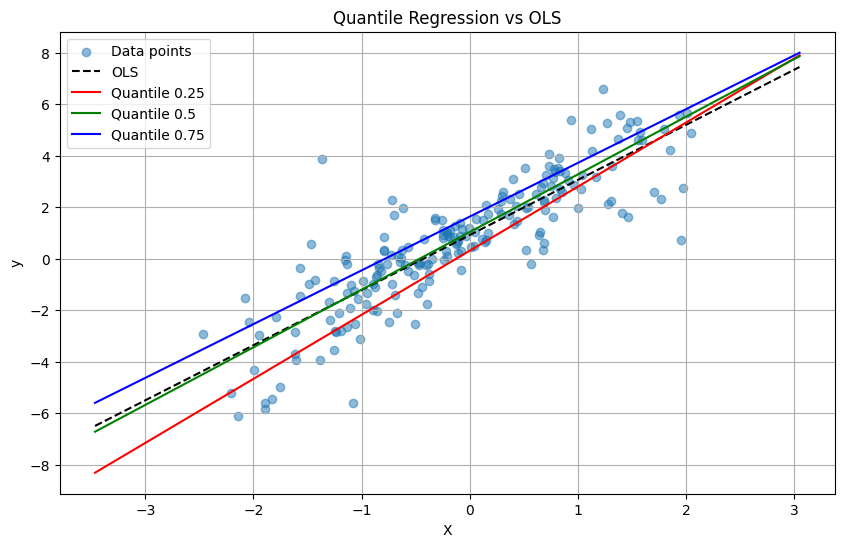

In [39]:
# Visualization
x_grid = np.linspace(X.min()-1, X.max()+1, 100)
X_grid_with_intercept = sm.add_constant(x_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Data points")

# Plot OLS fit
y_ols_pred = X_grid_with_intercept @ ols_model.params
plt.plot(x_grid, y_ols_pred, label="OLS", color='black', linestyle='dashed')

# Plot Quantile Regression fits
colors = ['red', 'green', 'blue']
for i, tau in enumerate(quantiles):
    y_quant_pred = X_grid_with_intercept @ models[tau].params
    plt.plot(x_grid, y_quant_pred, label=f"Quantile {tau}", color=colors[i])

plt.xlabel("X")
plt.ylabel("y")
plt.title("Quantile Regression vs OLS")
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree Regression

The method of **decision tree regression** constitutes a fundamentally different approach to modeling continuous response variables compared to the parametric methods previously discussed. Rather than positing a specific functional form linking covariates to the response, decision tree regression adopts a nonparametric, piecewise-constant modeling strategy.

Let $(x_i, y_i) \in \mathbb{R}^p \times \mathbb{R}$ for $i = 1, \dots, n$ be the observed dataset, where $x_i = (x_{i1}, \dots, x_{ip})^\top$ represents the covariates and $y_i$ is the continuous response variable.

The fundamental idea behind decision tree regression is to partition the covariate space $\mathbb{R}^p$ into a finite collection of disjoint **regions** $R_1, R_2, \dots, R_M$, where $M$ is determined either dynamically or through a specified constraint, and then to model the response as a constant within each region. That is, the model predicts:

$$
\hat{y}(x) = c_m \quad \text{for} \quad x \in R_m,
$$

where $c_m \in \mathbb{R}$ is the predicted value associated with region $R_m$.  The regions $R_m$ are constructed in a recursive, data-driven fashion. Each partitioning step splits one of the existing regions into two subregions along an axis-aligned hyperplane, that is, a threshold of a single covariate. Formally, at each step, one selects a covariate $j \in \{1, \dots, p\}$ and a threshold value $s \in \mathbb{R}$, and splits a current region $R \subset \mathbb{R}^p$ into two subregions:

$$
R_{\text{left}}(j, s) = \{x \in R : x_j \leq s\},
$$
$$
R_{\text{right}}(j, s) = \{x \in R : x_j > s\}.
$$

The selection of the variable $j$ and split point $s$ at each step is determined by an optimization criterion that seeks to minimize the prediction error within the resulting subregions.  In the regression setting, the most commonly used criterion is the minimization of the **sum of squared errors (SSE)**, leading to the following decision rule: at each node (region $R$), find the pair $(j, s)$ that minimizes

$$
\sum_{x_i \in R_{\text{left}}(j, s)} (y_i - \bar{y}_{\text{left}})^2 + \sum_{x_i \in R_{\text{right}}(j, s)} (y_i - \bar{y}_{\text{right}})^2,
$$

where

$$
\bar{y}_{\text{left}} = \frac{1}{|R_{\text{left}}(j, s)|} \sum_{x_i \in R_{\text{left}}(j, s)} y_i,
$$
$$
\bar{y}_{\text{right}} = \frac{1}{|R_{\text{right}}(j, s)|} \sum_{x_i \in R_{\text{right}}(j, s)} y_i,
$$

are the mean responses within each subregion. Thus, at each step, the decision tree grows by greedily choosing the split that minimizes the total variance within the newly created regions. The process of recursive binary splitting continues until a stopping criterion is met. Typical stopping criteria include:

1. A minimum number of observations required in a node before a split is attempted,
2. A minimum decrease in the residual sum of squares necessary to justify a split,
3. A maximum depth constraint limiting the number of sequential splits from the root to a terminal node.

After the tree is fully grown, it is common practice to apply **tree pruning** to mitigate overfitting. Pruning can be accomplished either by setting stringent growth parameters (pre-pruning) or by growing a large tree and subsequently removing branches that do not contribute significantly to predictive accuracy (post-pruning).

---

## Formal Characterization of the Tree Model

Let us formalize the structure induced by the decision tree model. Define an estimator $\hat{f}: \mathbb{R}^p \to \mathbb{R}$ as:

$$
\hat{f}(x) = \sum_{m=1}^M c_m \mathbf{1}_{\{x \in R_m\}},
$$

where $c_m = \frac{1}{|R_m|} \sum_{x_i \in R_m} y_i$ is the mean response in region $R_m$, and $\mathbf{1}_{\{x \in R_m\}}$ denotes the indicator function of the region.

Thus, the decision tree regressor is a **piecewise constant function** over the partition $\{R_m\}_{m=1}^M$ of the input space.

---

## Loss Function and Risk Minimization

The empirical risk minimized by decision tree regression corresponds to the empirical $L^2$ risk:

$$
\frac{1}{n} \sum_{i=1}^n (y_i - \hat{f}(x_i))^2,
$$

where $\hat{f}$ is restricted to the class of piecewise constant functions associated with the binary tree structure.  In terms of statistical learning theory, decision trees have low **bias** but potentially high **variance**. Because they partition the space finely to match the data closely, they can capture complex interactions between variables (thus achieving low bias), but they are prone to overfitting if the tree grows too deep (thus exhibiting high variance).  To control variance, techniques such as **early stopping**, **cost-complexity pruning**, and ensemble methods (e.g., bagging and random forests) are introduced.

---

## An Explicit Example in Python

Let us do an explicit example. As before, let us begin with generating our sythetic dataset:

In [40]:
n_samples = 200
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)  # X in [0,5]
y_true_function = np.sin(X).flatten()  # True underlying function
noise = np.random.normal(0, 0.2, size=n_samples)  # Additive noise
y = y_true_function + noise  # Observed response

Next, let us fit our model:

In [41]:
# Fit Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=4)  # Limit depth to control complexity
tree_regressor.fit(X, y)

# Prediction grid
X_test = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred = tree_regressor.predict(X_test)

An finally, let us plot the results:

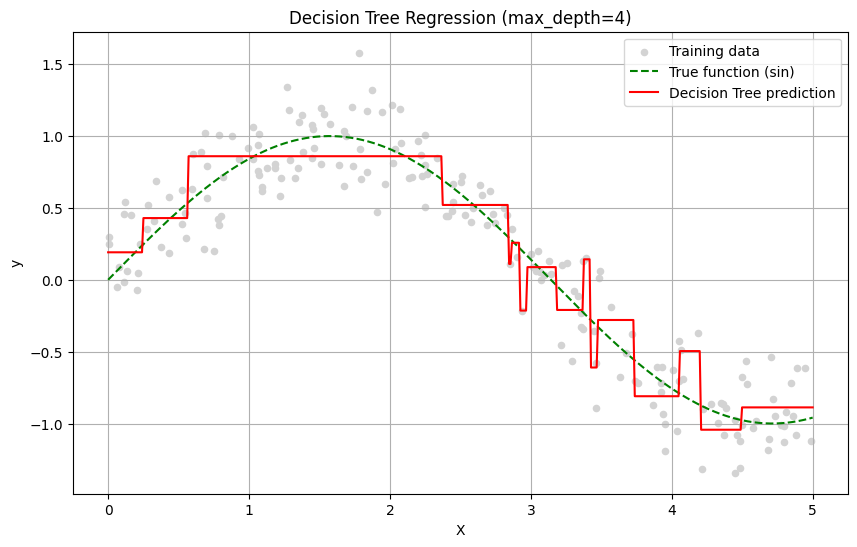

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, label="Training data", color="lightgray")
plt.plot(X_test, np.sin(X_test), label="True function (sin)", color="green", linestyle="dashed")
plt.plot(X_test, y_pred, label="Decision Tree prediction", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression (max_depth=4)")
plt.legend()
plt.grid(True)
plt.show()

# Support Vector Regression (SVR)

Support Vector Regression extends the foundational ideas of **Support Vector Machines (SVMs)**, originally developed for classification tasks, to the domain of **regression** with continuous response variables. The principal goal of SVR is to find a function that approximates the underlying relationship between the input variables and the output variable while simultaneously enforcing a form of margin-based control over the prediction errors. The fundamental formulation of SVR seeks a function $f(x)$ that deviates from the true observed outputs $y_i$ by at most a tolerance $\epsilon > 0$, and that is as flat as possible. In the linear case, SVR posits a model of the form:

$$
f(x) = w^\top x + b,
$$

where $w \in \mathbb{R}^p$ is the weight vector and $b \in \mathbb{R}$ is the bias (intercept) term. The requirement of **flatness** can be formally interpreted as the minimization of the Euclidean norm of the weight vector:

$$
\|w\|_2^2 = w^\top w.
$$

Thus, in its most basic form, the SVR optimization problem can be stated as:

$$
\min_{w, b} \frac{1}{2} \|w\|_2^2
$$
subject to the constraints:

$$
|y_i - w^\top x_i - b| \leq \epsilon, \quad i = 1, \dots, n.
$$

That is, the predicted value $f(x_i)$ must lie within an $\epsilon$-tube around the true output $y_i$ for every observation.  However, in practice, exact satisfaction of this constraint for every observation may not be possible, particularly in the presence of noise.  To accommodate deviations larger than $\epsilon$, **slack variables** $\xi_i, \xi_i^* \geq 0$ are introduced, allowing for controlled violations of the margin. The **soft margin SVR** optimization problem thus becomes:

$$
\min_{w, b, \xi, \xi^*} \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*),
$$
subject to:

$$
\begin{aligned}
y_i - w^\top x_i - b &\leq \epsilon + \xi_i, \\
w^\top x_i + b - y_i &\leq \epsilon + \xi_i^*, \\
\xi_i, \xi_i^* &\geq 0,
\end{aligned}
$$
for all $i = 1, \dots, n$. Here, $C > 0$ is a regularization parameter controlling the tradeoff between the flatness of $f$ and the amount by which deviations larger than $\epsilon$ are tolerated.

---

## Dual Formulation

As is standard in support vector methods, it is advantageous to derive and solve the **dual problem** via Lagrangian methods. Introducing dual variables $\alpha_i, \alpha_i^* \geq 0$, one can show that the dual optimization problem becomes:

$$
\max_{\alpha, \alpha^*} -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) x_i^\top x_j - \epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^*) + \sum_{i=1}^n y_i(\alpha_i - \alpha_i^*)
$$
subject to:

$$
\sum_{i=1}^n (\alpha_i - \alpha_i^*) = 0,
\quad 0 \leq \alpha_i, \alpha_i^* \leq C \quad \text{for all } i.
$$

Once the dual problem is solved, the weight vector $w$ can be recovered as:

$$
w = \sum_{i=1}^n (\alpha_i - \alpha_i^*) x_i,
$$

and the final regression function is:

$$
f(x) = \sum_{i=1}^n (\alpha_i - \alpha_i^*) x_i^\top x + b,
$$

where $b$ is determined from the Karush-Kuhn-Tucker (KKT) optimality conditions.

---

## Kernelization

The above development assumes a linear relationship between $x$ and $y$.  However, SVR naturally generalizes to nonlinear relationships via the **kernel trick**. One introduces a positive definite kernel function $K: \mathbb{R}^p \times \mathbb{R}^p \to \mathbb{R}$, such that $K(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle$ for some feature map $\phi$ into a high-dimensional (possibly infinite-dimensional) feature space. The dual problem then becomes:

$$
\max_{\alpha, \alpha^*} -\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) K(x_i, x_j) - \epsilon \sum_{i=1}^n (\alpha_i + \alpha_i^*) + \sum_{i=1}^n y_i(\alpha_i - \alpha_i^*),
$$
subject to the same constraints as before. The resulting regression function is:

$$
f(x) = \sum_{i=1}^n (\alpha_i - \alpha_i^*) K(x_i, x) + b.
$$

Thus, SVR models can capture complex nonlinear relationships without explicitly working in the high-dimensional feature space, relying entirely on the properties of the kernel. Commonly used kernels include:

- Linear kernel: $K(x, x') = x^\top x'$,
- Polynomial kernel: $K(x, x') = (x^\top x' + r)^d$,
- Radial basis function (RBF) kernel: $K(x, x') = \exp\left( -\gamma \|x - x'\|^2 \right)$.

---

## Sparsity Property

An important feature of SVR, similar to SVMs for classification, is the **sparsity** of the solution.  In the optimal solution, many of the dual variables $\alpha_i, \alpha_i^*$ are zero.  Only the observations corresponding to nonzero dual variables contribute to the final prediction function. These observations are termed **support vectors**. Thus, although the regression function formally involves a sum over all training points, in practice the sum is only over the support vectors, leading to a computationally efficient prediction rule.

---

## A Numerical example of Support Vector Regression using Python



In [45]:
n_samples = 100
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)  # X in [0,5]
true_function = np.sin(X).ravel()  # True function: sin(x)
noise = np.random.normal(0, 0.9, size=n_samples)  # Additive Gaussian noise
y = true_function + noise

# Define a fine test grid for prediction
X_test = np.linspace(0, 5, 500).reshape(-1, 1)

In [46]:
# Fit SVR models with different epsilon and C values
models = [
    ("SVR: epsilon=0.1, C=1.0", SVR(kernel='rbf', C=1.0, epsilon=0.1)),
    ("SVR: epsilon=0.5, C=1.0", SVR(kernel='rbf', C=1.0, epsilon=0.5)),
    ("SVR: epsilon=0.25, C=10.0", SVR(kernel='rbf', C=10.0, epsilon=0.25)),
]

# Train models and predict
predictions = []
for label, model in models:
    model.fit(X, y)
    y_pred = model.predict(X_test)
    predictions.append((label, y_pred))

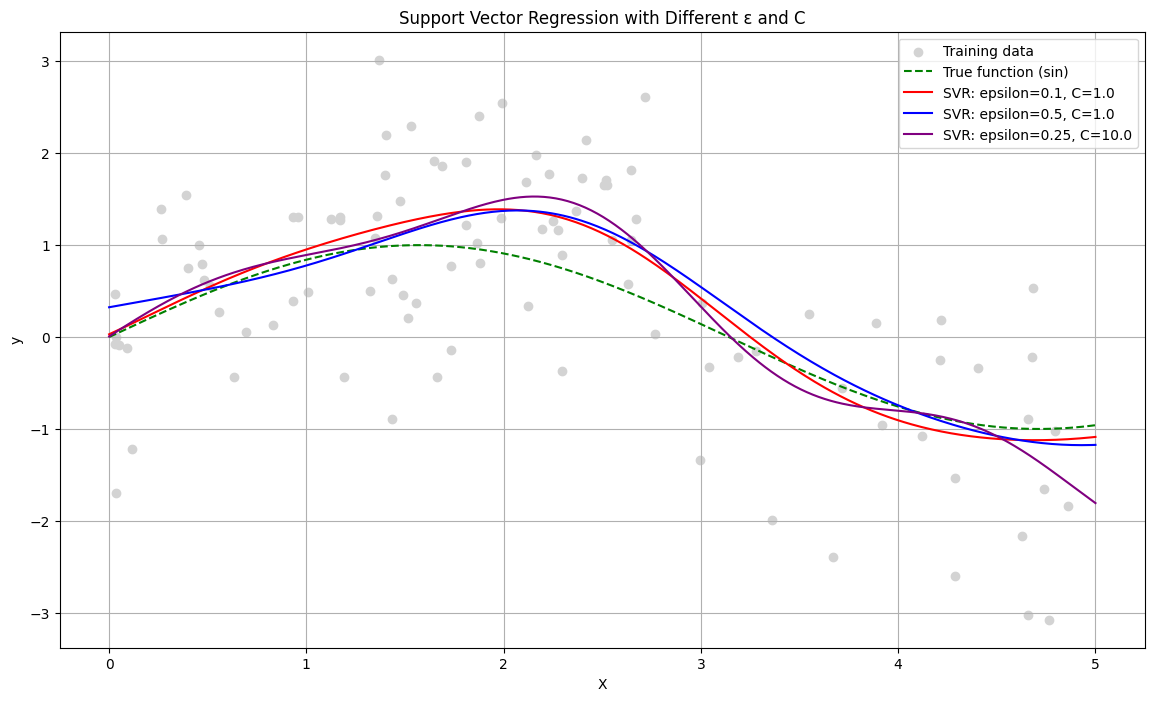

In [47]:
# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(X, y, color='lightgray', label="Training data")
plt.plot(X_test, np.sin(X_test), label="True function (sin)", color='green', linestyle='dashed')

colors = ['red', 'blue', 'purple']
for (label, y_pred), color in zip(predictions, colors):
    plt.plot(X_test, y_pred, label=label, color=color)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Support Vector Regression with Different ε and C")
plt.legend()
plt.grid(True)
plt.show()